In [17]:
import networkx as nx
import mplleaflet
import matplotlib.pyplot as plt
dic_pos = {u'0': [-77.51885109, 39.18193382],
                            u'1': [-76.6688633, 39.18],
                            u'2': [-77.2617, 39.1791792],
                            u'3': [-77.1927, 39.1782]}
GG = nx.Graph()
GG.add_nodes_from(dic_pos.keys())
GG.add_edge('0','2')

fig, ax = plt.subplots()

nx.draw_networkx_nodes(GG,pos=dic_pos,node_size=50,node_color='blue',edge_color='k',alpha=.5, with_labels=True)
nx.draw_networkx_edges(GG,pos=dic_pos,edge_color='gray', alpha=.8, width=5)
nx.draw_networkx_labels(GG,pos=dic_pos, label_pos =10.3)

mplleaflet.display(fig=ax.figure,tiles='cartodb_positron')

In [1]:
import pandas as pd

In [2]:
stations = pd.read_csv('data/station_location_utf8.txt', dtype={'line_id':str,
                                                               'station_id':str})

In [6]:
stations_sel = stations.ix[:,2:]
stations_sel.head(3)

,name,wgs_lng,wgs_lat
0,西朗,113.226701,23.067951
1,坑口,113.227102,23.081592
2,花地湾,113.228712,23.089772


In [11]:
stations_sel.shape

(186, 3)

In [10]:
stations_sel.loc[stations_sel.wgs_lat.isnull(),]

,name,wgs_lng,wgs_lat


In [12]:
stations_sel.drop_duplicates().shape

(165, 3)

In [13]:
stations_sel = stations_sel.drop_duplicates()

In [14]:
stations_sel.set_index('name')

,wgs_lng,wgs_lat
name,,
西朗,113.226701,23.067951
坑口,113.227102,23.081592
花地湾,113.228712,23.089772
芳村,113.230326,23.101230
黄沙,113.235108,23.112580
长寿路,113.236751,23.120921
陈家祠,113.240959,23.128364
西门口,113.250617,23.127886
公园前,113.258879,23.128098


In [16]:
stations_sel = stations_sel.set_index('name')

## create Digraph

In [18]:
G = nx.DiGraph()

In [19]:
G.add_nodes_from(stations_sel.index)

In [21]:
G.nodes()

['西朗',
 '坑口',
 '花地湾',
 '芳村',
 '黄沙',
 '长寿路',
 '陈家祠',
 '西门口',
 '公园前',
 '农讲所',
 '烈士陵园',
 '东山口',
 '杨箕',
 '体育西路',
 '体育中心',
 '广州东站',
 '江南西',
 '市二宫',
 '海珠广场',
 '纪念堂',
 '越秀公园',
 '广州火车站',
 '三元里',
 '飞翔公园',
 '白云公园',
 '白云文化广场',
 '萧岗',
 '江夏',
 '黄边',
 '嘉禾望岗',
 '昌岗',
 '江泰路',
 '东晓南',
 '南洲',
 '洛溪',
 '南浦',
 '会江',
 '石壁',
 '广州南站',
 '珠江新城',
 '广州塔',
 '客村',
 '大塘',
 '沥滘',
 '厦滘',
 '大石',
 '汉溪长隆',
 '市桥',
 '番禺广场',
 '天河客运站',
 '五山',
 '华师',
 '岗顶',
 '石牌桥',
 '黄村',
 '车陂',
 '万胜围',
 '官洲',
 '大学城北',
 '大学城南',
 '新造',
 '石碁',
 '海傍',
 '低涌',
 '东涌',
 '黄阁汽车城',
 '黄阁',
 '蕉门',
 '金洲',
 '滘口',
 '坦尾',
 '中山八',
 '西场',
 '西村',
 '小北',
 '淘金',
 '区庄',
 '动物园',
 '五羊邨',
 '猎德',
 '潭村',
 '员村',
 '科韵路',
 '车陂南',
 '东圃',
 '三溪',
 '鱼珠',
 '大沙地',
 '大沙东',
 '文冲',
 '浔峰岗',
 '横沙',
 '沙贝',
 '河沙',
 '如意坊',
 '文化公园',
 '一德路',
 '北京路',
 '团一大广场',
 '东湖',
 '黄花岗',
 '沙河顶',
 '天平架',
 '长湴',
 '龙洞',
 '高塘石',
 '黄陂',
 '金峰',
 '暹岗',
 '苏元',
 '萝岗',
 '香雪',
 '谢村',
 '钟村',
 '南村万博',
 '员岗',
 '板桥',
 '凤凰新村',
 '沙园',
 '宝岗大道',
 '晓港',
 '中大',
 '鹭江',
 '赤岗',
 '磨碟沙',
 '新港东',
 '琶洲',
 '林和西',
 '机场南',
 '人和',
 

In [28]:
for node in G.nodes():
    G.node[node] = (stations_sel.loc[node][0],stations_sel.loc[node][1])
    

In [26]:
stations_sel.loc['西门口',][0]

113.25061699999999

In [30]:
pos = G.node

In [32]:
edges1 = [('坑口', '花地湾', 930),
 ('花地湾', '芳村', 1330),
 ('芳村', '黄沙', 1380),
 ('如意坊', '黄沙', 1219),
 ('黄沙', '长寿路', 950),
 ('黄沙', '文化公园', 905),
 ('长寿路', '陈家祠', 1150),
 ('陈家祠', '西门口', 940),
 ('西门口', '公园前', 875),
 ('海珠广场', '公园前', 1268),
 ('公园前', '农讲所', 1175),
 ('公园前', '纪念堂', 785),
 ('农讲所', '烈士陵园', 1020),
 ('烈士陵园', '东山口', 1165),
 ('东湖', '东山口', 1368),
 ('东山口', '杨箕', 1320),
 ('动物园', '杨箕', 1153),
 ('东山口', '区庄', 1309),
 ('淘金', '区庄', 1056),
 ('杨箕', '体育西路', 1430),
 ('林和西', '体育西路', 1181),
 ('杨箕', '五羊邨', 1111),
 ('体育西路', '体育中心', 940),
 ('体育西路', '珠江新城', 1283),
 ('五羊邨', '珠江新城', 714),
 ('体育西路', '石牌桥', 1563),
 ('体育中心', '广州东站', 1870),
 ('燕塘', '广州东站', 1021),
 ('万胜围', '琶洲', 1828),
 ('万胜围', '官洲', 3681),
 ('琶洲', '新港东', 993),
 ('新港东', '磨碟沙', 1567),
 ('磨碟沙', '赤岗', 769),
 ('赤岗', '客村', 1486),
 ('广州塔', '客村', 1178),
 ('客村', '鹭江', 1240),
 ('客村', '大塘', 2057),
 ('鹭江', '中大', 1695),
 ('中大', '晓港', 1189),
 ('昌岗', '晓港', 673),
 ('江南西', '市二宫', 1061),
 ('江南西', '昌岗', 817),
 ('宝岗大道', '昌岗', 839),
 ('市二宫', '海珠广场', 999),
 ('一德路', '海珠广场', 922),
 ('海珠广场', '北京路', 630),
 ('纪念堂', '越秀公园', 869),
 ('越秀公园', '广州火车站', 1098),
 ('西村', '广州火车站', 1717),
 ('广州火车站', '三元里', 1220),
 ('飞翔公园', '三元里', 1373),
 ('广州火车站', '小北', 2207),
 ('广州东站', '林和西', 1107),
 ('珠江新城', '广州塔', 1479),
 ('珠江新城', '猎德', 1155),
 ('大塘', '沥滘', 2647),
 ('沥滘', '厦滘', 1815),
 ('厦滘', '大石', 2238),
 ('大石', '汉溪长隆', 3050),
 ('钟村', '汉溪长隆', 1663),
 ('汉溪长隆', '市桥', 6163),
 ('汉溪长隆', '南村万博', 2219),
 ('市桥', '番禺广场', 3743),
 ('官洲', '大学城北', 1421),
 ('大学城北', '大学城南', 2140),
 ('板桥', '大学城南', 3778),
 ('大学城南', '新造', 2290),
 ('新造', '石碁', 9746),
 ('石碁', '海傍', 2251),
 ('海傍', '低涌', 2452),
 ('低涌', '东涌', 3942),
 ('东涌', '黄阁汽车城', 6435),
 ('黄阁汽车城', '黄阁', 1544),
 ('石牌桥', '岗顶', 821),
 ('岗顶', '华师', 889),
 ('华师', '五山', 1554),
 ('五山', '天河客运站', 2360),
 ('燕塘', '天河客运站', 2214),
 ('黄阁', '蕉门', 3032),
 ('蕉门', '金洲', 1960),
 ('车陂南', '万胜围', 2160),
 ('车陂南', '东圃', 1360),
 ('滘口', '坦尾', 1637),
 ('河沙', '坦尾', 1180),
 ('坦尾', '中山八', 1617),
 ('坦尾', '如意坊', 1867),
 ('中山八', '西场', 1390),
 ('西场', '西村', 717),
 ('小北', '淘金', 1064),
 ('区庄', '动物园', 1075),
 ('区庄', '黄花岗', 882),
 ('猎德', '潭村', 1374),
 ('潭村', '员村', 1881),
 ('员村', '科韵路', 1466),
 ('科韵路', '车陂南', 1375),
 ('车陂', '车陂南', 1185),
 ('东圃', '三溪', 1599),
 ('三溪', '鱼珠', 1757),
 ('鱼珠', '大沙地', 1539),
 ('大沙地', '大沙东', 1376),
 ('大沙东', '文冲', 1094),
 ('嘉禾望岗', '黄边', 1764),
 ('黄边', '江夏', 1237),
 ('江夏', '萧岗', 1432),
 ('萧岗', '白云文化广场', 1154),
 ('白云文化广场', '白云公园', 1010),
 ('白云公园', '飞翔公园', 1531),
 ('昌岗', '江泰路', 905),
 ('江泰路', '东晓南', 1974),
 ('东晓南', '南洲', 902),
 ('南洲', '洛溪', 2411),
 ('洛溪', '南浦', 1193),
 ('南浦', '会江', 2432),
 ('会江', '石壁', 2374),
 ('广州南站', '石壁', 1120),
 ('石壁', '广州南站', 1035),
 ('石壁', '谢村', 1907),
 ('黄村', '车陂', 1830),
 ('凤凰新村', '沙园', 833),
 ('沙园', '宝岗大道', 1053),
 ('人和', '龙归', 5391),
 ('龙归', '嘉禾望岗', 6287),
 ('白云大道北', '嘉禾望岗', 2123),
 ('永泰', '同和', 3398),
 ('永泰', '白云大道北', 953),
 ('同和', '京溪南方医院', 1371),
 ('京溪南方医院', '梅花园', 1329),
 ('梅花园', '燕塘', 1911),
 ('天平架', '燕塘', 646),
 ('魁奇路', '季华园', 1511),
 ('季华园', '同济路', 1301),
 ('同济路', '祖庙', 1152),
 ('祖庙', '普君北路', 1114),
 ('普君北路', '朝安', 1066),
 ('朝安', '桂城', 985),
 ('桂城', '南桂路', 1358),
 ('南桂路', '虫雷岗', 984),
 ('虫雷岗', '千灯湖', 1369),
 ('千灯湖', '金融高新区', 1422),
 ('金融高新区', '龙溪', 3473),
 ('龙溪', '菊树', 2129),
 ('菊树', '西朗', 2040),
 ('西朗', '坑口', 1520),
 ('浔峰岗', '横沙', 805),
 ('横沙', '沙贝', 809),
 ('沙贝', '河沙', 2159),
 ('文化公园', '一德路', 925),
 ('北京路', '团一大广场', 875),
 ('团一大广场', '东湖', 1167),
 ('黄花岗', '沙河顶', 990),
 ('天河客运站', '长湴', 989),
 ('高塘石', '黄陂', 2298),
 ('黄陂', '金峰', 2176),
 ('金峰', '暹岗', 1363),
 ('暹岗', '苏元', 951),
 ('苏元', '萝岗', 1394),
 ('萝岗', '香雪', 2101),
 ('谢村', '钟村', 2147),
 ('南村万博', '员岗', 2262),
 ('员岗', '板桥', 2406),
 ('机场南', '高增', 3544),
 ('高增', '人和', 2434)]

In [36]:
edges2 = []
for i in range(len(edges1)):
    edges2.append((edges1[i][1],edges1[i][0],edges1[i][2]))

In [37]:
print(edges1[0])
print(edges2[0])

('坑口', '花地湾', 930)
('花地湾', '坑口', 930)


In [38]:
G.add_weighted_edges_from(edges1)

In [39]:
G.add_weighted_edges_from(edges2)

## draw the network

In [44]:
fig, ax = plt.subplots()
nx.draw_networkx_nodes(G,pos=pos,node_size=5,node_color='blue',edge_color='k',alpha=.5, with_labels=True)
nx.draw_networkx_edges(G,pos=pos,edge_color='gray', alpha=.8, width=1)

mplleaflet.display(fig=ax.figure,tiles='cartodb_positron')

In [45]:
# add some edges
# 沙河-天平架
G.add_weighted_edges_from([('沙河顶', '天平架', 1512),
('天平架', '沙河顶', 1512)])

In [47]:
fig, ax = plt.subplots()
nx.draw_networkx_nodes(G,pos=pos,node_size=5,node_color='blue',edge_color='k',alpha=.5, with_labels=True)
nx.draw_networkx_edges(G,pos=pos,edge_color='gray', alpha=.8, width=1)

mplleaflet.show(fig=ax.figure,tiles='cartodb_positron')

## Analysis Network

In [51]:
from itertools import islice
def k_shortest_path(G, source, target, k, weight):
    return list(islice(nx.shortest_simple_paths(G, source, target, weight=weight), k))
    

In [95]:
for path in k_shortest_path(G, '公园前', '同和', 5,'weight'):
    print(len(path),path)
#     print(nx.shortest_path_length(path))

12 ['公园前', '农讲所', '烈士陵园', '东山口', '区庄', '黄花岗', '沙河顶', '天平架', '燕塘', '梅花园', '京溪南方医院', '同和']
12 ['公园前', '农讲所', '烈士陵园', '东山口', '杨箕', '体育西路', '林和西', '广州东站', '燕塘', '梅花园', '京溪南方医院', '同和']
12 ['公园前', '农讲所', '烈士陵园', '东山口', '杨箕', '体育西路', '体育中心', '广州东站', '燕塘', '梅花园', '京溪南方医院', '同和']
14 ['公园前', '海珠广场', '北京路', '团一大广场', '东湖', '东山口', '区庄', '黄花岗', '沙河顶', '天平架', '燕塘', '梅花园', '京溪南方医院', '同和']
14 ['公园前', '农讲所', '烈士陵园', '东山口', '杨箕', '动物园', '区庄', '黄花岗', '沙河顶', '天平架', '燕塘', '梅花园', '京溪南方医院', '同和']


In [52]:
for path in k_shortest_path(G, '东山口', '机场南', 3, 'weight'):
    print (path)

['东山口', '区庄', '淘金', '小北', '广州火车站', '三元里', '飞翔公园', '白云公园', '白云文化广场', '萧岗', '江夏', '黄边', '嘉禾望岗', '龙归', '人和', '高增', '机场南']
['东山口', '区庄', '黄花岗', '沙河顶', '天平架', '燕塘', '梅花园', '京溪南方医院', '同和', '永泰', '白云大道北', '嘉禾望岗', '龙归', '人和', '高增', '机场南']
['东山口', '烈士陵园', '农讲所', '公园前', '纪念堂', '越秀公园', '广州火车站', '三元里', '飞翔公园', '白云公园', '白云文化广场', '萧岗', '江夏', '黄边', '嘉禾望岗', '龙归', '人和', '高增', '机场南']


In [53]:
def k_shortest_path_edges(G, source, target, k, weight):
    paths = k_shortest_path(G, source, target, k, weight)
    edges_list = []
    for path in paths:
        path_list = list(zip(path,path[1:]))
        edges_list.append(path_list)
    return edges_list
        

In [54]:
k_shortest_path_edges(G, '东山口', '机场南', 3, 'weight')

[[('东山口', '区庄'),
  ('区庄', '淘金'),
  ('淘金', '小北'),
  ('小北', '广州火车站'),
  ('广州火车站', '三元里'),
  ('三元里', '飞翔公园'),
  ('飞翔公园', '白云公园'),
  ('白云公园', '白云文化广场'),
  ('白云文化广场', '萧岗'),
  ('萧岗', '江夏'),
  ('江夏', '黄边'),
  ('黄边', '嘉禾望岗'),
  ('嘉禾望岗', '龙归'),
  ('龙归', '人和'),
  ('人和', '高增'),
  ('高增', '机场南')],
 [('东山口', '区庄'),
  ('区庄', '黄花岗'),
  ('黄花岗', '沙河顶'),
  ('沙河顶', '天平架'),
  ('天平架', '燕塘'),
  ('燕塘', '梅花园'),
  ('梅花园', '京溪南方医院'),
  ('京溪南方医院', '同和'),
  ('同和', '永泰'),
  ('永泰', '白云大道北'),
  ('白云大道北', '嘉禾望岗'),
  ('嘉禾望岗', '龙归'),
  ('龙归', '人和'),
  ('人和', '高增'),
  ('高增', '机场南')],
 [('东山口', '烈士陵园'),
  ('烈士陵园', '农讲所'),
  ('农讲所', '公园前'),
  ('公园前', '纪念堂'),
  ('纪念堂', '越秀公园'),
  ('越秀公园', '广州火车站'),
  ('广州火车站', '三元里'),
  ('三元里', '飞翔公园'),
  ('飞翔公园', '白云公园'),
  ('白云公园', '白云文化广场'),
  ('白云文化广场', '萧岗'),
  ('萧岗', '江夏'),
  ('江夏', '黄边'),
  ('黄边', '嘉禾望岗'),
  ('嘉禾望岗', '龙归'),
  ('龙归', '人和'),
  ('人和', '高增'),
  ('高增', '机场南')]]

In [87]:
def draw_k_shortest_path_edges(G, source, target, k, weight):
    edge_list = k_shortest_path_edges(G, source, target, k, weight)
    fig, ax = plt.subplots()
    nx.draw_networkx(G,pos=pos,node_size=5,node_color='blue',edge_color='k',alpha=.5, with_labels=False, arrows=False)
    nx.draw_networkx_edges(G, pos=pos, edgelist=edge_list[0], edge_color='r', width=1, arrows=True)
    nx.draw_networkx_edges(G, pos=pos, edgelist=edge_list[1], edge_color='m', width=1, arrows=True)
    nx.draw_networkx_edges(G, pos=pos, edgelist=edge_list[2], edge_color='g', width=1, arrows=True)
    mplleaflet.show(fig=ax.figure,tiles='cartodb_positron')

In [89]:
draw_k_shortest_path_edges(G, '万胜围', '公园前', 3, 'weight')

In [75]:
edge_list = k_shortest_path_edges(G, '东山口', '机场南', 3, 'weight')

In [76]:
edge_list[0]

[('东山口', '区庄'),
 ('区庄', '淘金'),
 ('淘金', '小北'),
 ('小北', '广州火车站'),
 ('广州火车站', '三元里'),
 ('三元里', '飞翔公园'),
 ('飞翔公园', '白云公园'),
 ('白云公园', '白云文化广场'),
 ('白云文化广场', '萧岗'),
 ('萧岗', '江夏'),
 ('江夏', '黄边'),
 ('黄边', '嘉禾望岗'),
 ('嘉禾望岗', '龙归'),
 ('龙归', '人和'),
 ('人和', '高增'),
 ('高增', '机场南')]

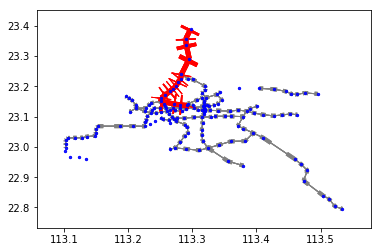

In [78]:
nx.draw_networkx_edges(G, pos=pos, edgelist=edge_list[0], edge_color='r', width=5)
plt.show()

## Save the graph

In [106]:
# write graphml
# nx.write_graphml_lxml(G,'data/gz_metro.graphml',encoding='gbk')
# 可能是node的数据是tuple
nx.write_graphml(G, "gz_metro.graphml")  

AttributeError: 'tuple' object has no attribute 'items'

In [98]:
type(G)

networkx.classes.digraph.DiGraph

In [100]:
# gpickle
nx.write_gpickle(G, 'data/gz_metro.gpickle')

{'一德路': {'文化公园': {'weight': 925}, '海珠广场': {'weight': 922}},
 '万胜围': {'官洲': {'weight': 3681},
  '琶洲': {'weight': 1828},
  '车陂南': {'weight': 2160}},
 '三元里': {'广州火车站': {'weight': 1220}, '飞翔公园': {'weight': 1373}},
 '三溪': {'东圃': {'weight': 1599}, '鱼珠': {'weight': 1757}},
 '世纪莲': {},
 '东圃': {'三溪': {'weight': 1599}, '车陂南': {'weight': 1360}},
 '东山口': {'东湖': {'weight': 1368},
  '区庄': {'weight': 1309},
  '杨箕': {'weight': 1320},
  '烈士陵园': {'weight': 1165}},
 '东平': {},
 '东晓南': {'南洲': {'weight': 902}, '江泰路': {'weight': 1974}},
 '东涌': {'低涌': {'weight': 3942}, '黄阁汽车城': {'weight': 6435}},
 '东湖': {'东山口': {'weight': 1368}, '团一大广场': {'weight': 1167}},
 '中大': {'晓港': {'weight': 1189}, '鹭江': {'weight': 1695}},
 '中山八': {'坦尾': {'weight': 1617}, '西场': {'weight': 1390}},
 '五山': {'华师': {'weight': 1554}, '天河客运站': {'weight': 2360}},
 '五羊邨': {'杨箕': {'weight': 1111}, '珠江新城': {'weight': 714}},
 '京溪南方医院': {'同和': {'weight': 1371}, '梅花园': {'weight': 1329}},
 '人和': {'高增': {'weight': 2434}, '龙归': {'weight': 5391}},
 '会江':

In [118]:
pos_dict = {}
for k in pos.keys():
    pos[k] = list(pos[k])
    pos_dict[k] = pos[k]

In [127]:
dict(zip(list(pos['一德路'])))

ValueError: dictionary update sequence element #0 has length 1; 2 is required

In [119]:
G2 = G

In [120]:
G2.node = pos_dict

In [121]:
G2.node

{'一德路': [113.25191720000001, 23.115652570000002],
 '万胜围': [113.3792297, 23.100243330000001],
 '三元里': [113.2519034, 23.161895730000001],
 '三溪': [113.4103332, 23.106516110000001],
 '世纪莲': [113.10895249999999, 22.967765],
 '东圃': [113.39612509999999, 23.11191208],
 '东山口': [113.2904216, 23.126755930000002],
 '东平': [113.12371170000002, 22.967887040000001],
 '东晓南': [113.2890197, 23.0738509],
 '东涌': [113.47361840000001, 22.88825880000001],
 '东湖': [113.2841, 23.1173],
 '中大': [113.28774629999999, 23.094707329999999],
 '中山八': [113.22759019999999, 23.12817317],
 '五山': [113.3464249, 23.155115940000002],
 '五羊邨': [113.30889599999999, 23.122464770000001],
 '京溪南方医院': [113.32067109999998, 23.187821660000001],
 '人和': [113.29061850000001, 23.337902060000001],
 '会江': [113.28123899999999, 23.015508659999998],
 '低涌': [113.4794358, 22.922423850000001],
 '体育中心': [113.3229, 23.1374],
 '体育中心南': [113.3185, 23.136700000000001],
 '体育西路': [113.3160915, 23.133715460000001],
 '公园前': [113.2588787, 23.128097910000001],


In [122]:
nx.write_graphml(G2, 'data/gz_metro.graphml')

AttributeError: 'list' object has no attribute 'items'